In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

2025-06-09 15:33:36.051342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749483216.263646      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749483216.324374      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
normal_df = pd.read_csv("../data/WADI_14days_new.csv", index_col=0)
attack_df = pd.read_csv("../data/WADI_attackdataLABLE.csv", index_col=0)
attack_df.columns = attack_df.iloc[0]  # Use the first row as header
attack_df = attack_df[1:]
attack_df = attack_df.reset_index(drop=True)
normal_df = normal_df.reset_index(drop=True)

/tmp/ipykernel_35/2093216043.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  attack_df = pd.read_csv("/kaggle/input/wadi-data/WADI_attackdataLABLE.csv", index_col=0)


In [3]:
normal_df

,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,9/25/2017,00:00.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
1,9/25/2017,00:01.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
2,9/25/2017,00:02.0,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
3,9/25/2017,00:03.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
4,9/25/2017,00:04.0,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784566,10/7/17,16:06.0,175.855,0.589478,11.8941,479.191,0.331571,0.001128,0,0,...,1,1,1,1,1,1,1,60.6305,1,0.25
784567,10/7/17,16:07.0,175.855,0.589478,11.8941,479.191,0.331571,0.001128,0,0,...,1,1,1,1,1,1,1,60.6305,1,0.25
784568,10/7/17,16:08.0,175.855,0.589478,11.8941,479.191,0.331571,0.001128,0,0,...,1,1,1,1,1,1,1,60.6305,1,0.25
784569,10/7/17,16:09.0,175.896,0.613476,11.8913,479.224,0.331622,0.001173,0,0,...,1,1,1,1,1,1,1,60.4477,1,0.25


In [4]:
attack_df.isna().sum().sort_values()

Row 
Attack LABLE (1:No Attack, -1:Attack)         0
2_MV_201_STATUS                               2
2_SV_101_STATUS                               2
2_PIT_003_PV                                  2
2_PIT_002_PV                                  2
                                          ...  
2_FQ_401_PV                                   2
2_P_002_STATUS                           172803
2_P_001_STATUS                           172803
2_LS_002_AL                              172803
2_LS_001_AL                              172803
Length: 130, dtype: int64

In [5]:
normal_df.isna().sum().sort_values(ascending=False)[:20]

2_LS_001_AL        784571
2_LS_002_AL        784571
2_P_002_STATUS     784571
2_P_001_STATUS     784571
1_AIT_002_PV           12
2B_AIT_004_PV          10
3_AIT_004_PV            6
1_AIT_004_PV            6
2_MV_201_STATUS         0
2_MV_301_STATUS         0
2_MV_401_STATUS         0
2_MV_501_STATUS         0
2_MV_101_STATUS         0
2_P_003_SPEED           0
2_P_003_STATUS          0
2_P_004_SPEED           0
2_P_004_STATUS          0
2_PIC_003_CO            0
2_PIC_003_SP            0
2_MV_601_STATUS         0
dtype: int64

In [6]:
null_cols = ['2_LS_001_AL', '2_LS_002_AL', '2_P_001_STATUS', '2_P_002_STATUS']
normal_df.drop(null_cols, axis=1, inplace=True)
attack_df.drop(null_cols, axis=1, inplace=True)

In [7]:
attack_df.dropna(axis=0, inplace=True)

In [8]:
normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']] = normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']].fillna(method='bfill')

/tmp/ipykernel_35/2759473663.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']] = normal_df[['1_AIT_002_PV', '2B_AIT_004_PV', '3_AIT_004_PV', '1_AIT_004_PV']].fillna(method='bfill')


In [9]:
train_cols = normal_df.columns.drop(['Date','Time'])
normal_df[train_cols] = normal_df[train_cols].astype(float)
attack_df[train_cols] = attack_df[train_cols].astype(float)

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
normal_df_scaled = scaler.fit_transform(normal_df[train_cols])
attack_df_scaled = scaler.transform(attack_df[train_cols])

normal_df_scaled = pd.DataFrame(normal_df_scaled, columns=train_cols)
attack_df_scaled = pd.DataFrame(attack_df_scaled, columns=train_cols)

label = attack_df[attack_df.columns[-1]]
label = label.astype(int)

In [ ]:
# normal_df_scaled.drop(['2B_AIT_002_PV'], axis=1, inplace=True)
# attack_df_scaled.drop(['2B_AIT_002_PV'], axis=1, inplace=True)

In [12]:
train_cols = normal_df_scaled.columns

In [13]:
def create_windows(df, window_size=30, step_size=30):
    windows = []
    for start in range(0, len(df) - window_size + 1, step_size):
        end = start + window_size
        windows.append(df.iloc[start:end].values)
    return np.array(windows)

In [14]:
WINDOW_SIZE = 30
WINDOW_STEP = 10

attack_windows = create_windows(attack_df_scaled, WINDOW_SIZE, step_size=WINDOW_STEP)
normal_windows = create_windows(normal_df_scaled, WINDOW_SIZE, step_size=WINDOW_STEP)

In [15]:
print(f"Normal windows shape: {normal_windows.shape}")
print(f"Attack windows shape: {attack_windows.shape}")

Normal windows shape: (78455, 30, 122)
Attack windows shape: (17278, 30, 122)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential

In [17]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask = True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x

class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads,
                dff, dropout_rate=0.1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.proj = tf.keras.layers.Dense(d_model)
        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                        num_heads=num_heads,
                        dff=dff,
                        dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.proj(x)  # Shape `(batch_size, seq_len, d_model)`.

        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self,
                *,
                d_model,
                num_heads,
                dff,
                dropout_rate=0.1):
        super(DecoderLayer, self).__init__()

        self.causal_self_attention = CausalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.cross_attention = CrossAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)

        # Cache the last attention scores for plotting later
        self.last_attn_scores = self.cross_attention.last_attn_scores

        x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
        return x

class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff,
                dropout_rate=0.1):
            super(Decoder, self).__init__()

            self.d_model = d_model
            self.num_layers = num_layers

            self.proj = tf.keras.layers.Dense(d_model)
            self.dropout = tf.keras.layers.Dropout(dropout_rate)
            self.dec_layers = [
                DecoderLayer(d_model=d_model, num_heads=num_heads,
                            dff=dff, dropout_rate=dropout_rate)
                for _ in range(num_layers)]

            self.last_attn_scores = None
    
    def call(self, x, context):
        # `x` is token-IDs shape (batch, target_seq_len)
        x = self.proj(x)  # (batch_size, target_seq_len, d_model)

        x = self.dropout(x)

        for i in range(self.num_layers):
            x  = self.dec_layers[i](x, context)
            
        # The shape of x is (batch_size, target_seq_len, d_model).
        return x

sample_encoder = Encoder(num_layers=2, d_model=123, num_heads=8, dff=32, dropout_rate=0.1)

pt_emb = tf.random.uniform((32, 30, 123))
print(pt_emb.shape)
print(sample_encoder(pt_emb).shape)

sample_decoder = Decoder(num_layers=2, d_model=123, num_heads=8, dff=32, dropout_rate=0.1)
pt_emb = tf.random.uniform((32, 30, 15)) 
print(pt_emb.shape)
print(sample_decoder(pt_emb, pt_emb).shape)

I0000 00:00:1749483259.726571      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


(32, 30, 123)
(32, 30, 123)
(32, 30, 15)
(32, 30, 123)


In [18]:
class Transformer(tf.keras.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff, dropout_rate=0.1):
      super().__init__()
      self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                            num_heads=num_heads, dff=dff,
                            dropout_rate=dropout_rate)

      self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                            num_heads=num_heads, dff=dff,
                            dropout_rate=dropout_rate)

    def call(self, inputs, training=False):
      # To use a Keras model with `.fit` you must pass all your inputs in the
      # first argument.
      context, x  = inputs

      context = self.encoder(context)  # (batch_size, context_len, d_model)

      x = self.decoder(x, context)  # (batch_size, target_len, d_model)

      return x

In [19]:
random_input = tf.random.uniform((1, WINDOW_SIZE, len(train_cols)))
random_latent = tf.random.uniform((1, WINDOW_SIZE, 15))
transformer_block = Transformer(num_layers=2, d_model=len(train_cols), num_heads=4, dff=32)
output = transformer_block([random_input, random_latent])
print(f"Output shape: {output.shape}")

Output shape: (1, 30, 122)


In [20]:
class Generator(Model):
    def __init__(self, num_signals, num_layers, num_heads, dff, dropout, learn_scale=True):
        super().__init__()
        # Custom initializers if provided
        scale_init = tf.keras.initializers.Constant(1.0)

        self.transformer_block = Transformer(num_layers=num_layers, 
                                             d_model=num_signals, 
                                             num_heads=num_heads, 
                                             dff=dff, 
                                             dropout_rate=dropout)

        if learn_scale:
            self.scale = tf.Variable(initial_value=scale_init(shape=(1,)), trainable=True, name='scale_out_G')
        else:
            self.scale = tf.constant(1.0, shape=(1,))

    def call(self, inputs, training=False):
        x = self.transformer_block(inputs, training=False)
        output = tf.nn.tanh(x) * self.scale
        return output

In [21]:
class Discriminator(tf.keras.Model):
    def __init__(self, num_signals, num_layers, num_heads, dff, dropout, **kwargs):
        super().__init__(**kwargs)

        kernel_init = tf.keras.initializers.TruncatedNormal()
        bias_init = tf.keras.initializers.TruncatedNormal()

        self.transformer_block = Transformer(num_layers=num_layers, 
                                             d_model=num_signals, 
                                             num_heads=num_heads, 
                                             dff=dff, 
                                             dropout_rate=dropout)
        
        self.linear = tf.keras.layers.Dense(
            1,
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
            name="dense"
        )

    def call(self, x, training=False):
        output = self.transformer_block([x, x], training=training)
        prob = tf.nn.sigmoid(self.linear(output))
        prob = tf.reduce_mean(prob, axis=1) 
        return tf.squeeze(prob, axis=-1)  

In [22]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output, noise=0.1):
    real_loss = cross_entropy(tf.ones_like(real_output)-noise*tf.random.uniform(tf.shape(real_output)), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output)+noise*tf.random.uniform(tf.shape(fake_output)), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [23]:
class TGANAD(tf.keras.Model):
    def __init__(self, generator, discriminator, noise=0.1, **kwargs):
        super(TGANAD, self).__init__(**kwargs)
        self.generator = generator
        self.discriminator = discriminator
        self.gen_loss_metric = tf.keras.metrics.Mean(name='gen_loss')
        self.disc_loss_metric = tf.keras.metrics.Mean(name='disc_loss')
        self.accuracy_metric = tf.keras.metrics.BinaryAccuracy (name='accuracy')
        self.noise = noise

    def call(self, inputs, training=False):
        generated_data = self.generator(inputs, training=training)
        disc_output = self.discriminator(generated_data, training=training)
        return generated_data, disc_output

    def compile(self, gen_optimizer, disc_optimizer, **kwargs):
        super(TGANAD, self).compile(**kwargs)
        self.gen_optimizer = gen_optimizer
        self.disc_optimizer = disc_optimizer
    
    @property
    def metrics(self):
        return [self.gen_loss_metric, self.disc_loss_metric, self.accuracy_metric]
    
    def train_step(self, data):
        real_data = data
        batch_size = tf.shape(real_data)[0]

        # Train Discriminator
        with tf.GradientTape() as disc_tape:
            noise = tf.random.normal((batch_size, WINDOW_SIZE, LATENT_DIM))
            generated_data = self.generator([real_data, noise], training=True)
            real_output = self.discriminator(real_data, training=True)
            fake_output = self.discriminator(generated_data, training=True)
            disc_loss = discriminator_loss(real_output, fake_output, self.noise)
            preds = tf.concat([fake_output, real_output], axis=0)
            labels = tf.concat([tf.zeros_like(fake_output), tf.ones_like(real_output)], axis=0)
        disc_gradients = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.disc_optimizer.apply_gradients(zip(disc_gradients, self.discriminator.trainable_variables))

        # Train Generator
        with tf.GradientTape() as gen_tape:
            noise = tf.random.normal((batch_size, WINDOW_SIZE, LATENT_DIM))
            generated_data = self.generator([real_data, noise], training=True)
            fake_output = self.discriminator(generated_data, training=True)
            gen_loss = generator_loss(fake_output)

        gen_gradients = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.generator.trainable_variables))

        # Update metrics
        self.gen_loss_metric.update_state(gen_loss)
        self.disc_loss_metric.update_state(disc_loss)
        self.accuracy_metric.update_state(labels, preds)

        return {
            "disc_loss": self.disc_loss_metric.result(),
            "gen_loss": self.gen_loss_metric.result(),
            "accuracy": self.accuracy_metric.result()
        }
    
    def test_step(self, data):
        real_data = data
        batch_size = tf.shape(real_data)[0]

        noise = tf.random.normal((batch_size, WINDOW_SIZE, LATENT_DIM))
        generated_data = self.generator([real_data, noise], training=False)
        real_output = self.discriminator(real_data, training=False)
        fake_output = self.discriminator(generated_data, training=False)
        preds = tf.concat([fake_output, real_output], axis=0)
        labels = tf.concat([tf.zeros_like(fake_output), tf.ones_like(real_output)], axis=0)

        disc_loss = discriminator_loss(real_output, fake_output, self.noise)
        gen_loss = generator_loss(fake_output)

        self.gen_loss_metric.update_state(gen_loss)
        self.disc_loss_metric.update_state(disc_loss)
        self.accuracy_metric.update_state(labels, preds)

        return {
            "disc_loss": self.disc_loss_metric.result(),
            "gen_loss": self.gen_loss_metric.result(),
            "accuracy": self.accuracy_metric.result()
        }

In [24]:
HIDDEN_UNITS = 100
DROPOUT = 0.1
LATENT_DIM = 15
NUM_SIGNALS = len(train_cols)
LEARN_SCALE = True
NUM_LAYERS = 4
NUM_HEADS = 4
DFF = 32

gen_config = {
    'num_signals': NUM_SIGNALS,
    'num_layers': NUM_LAYERS,
    'num_heads': NUM_HEADS,
    'dff': DFF,
    'dropout': 0.0,
    'learn_scale': LEARN_SCALE
}

generator = Generator(**gen_config)
generator.build(input_shape=[(None, WINDOW_SIZE, len(train_cols)), (None, WINDOW_SIZE, LATENT_DIM)])

dummy_input_gen = tf.random.normal((1, WINDOW_SIZE, len(train_cols)))
dummy_latent_gen = tf.random.normal((1, WINDOW_SIZE, LATENT_DIM))
output_gen = generator([dummy_input_gen, dummy_latent_gen])

print(f"Generator output shape: {output_gen.shape}")

disc_config = {
    'num_signals': NUM_SIGNALS,
    'num_layers': NUM_LAYERS,
    'num_heads': NUM_HEADS,
    'dff': DFF,
    'dropout': 0.1
}


discriminator = Discriminator(**disc_config)

discriminator.build(input_shape=(None, WINDOW_SIZE, len(train_cols)))

dummy_input_disc = tf.random.normal((1, WINDOW_SIZE, len(train_cols)))
output_disc = discriminator(dummy_input_disc)

print(f"Discriminator output shape: {output_disc.shape}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'generator', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Generator output shape: (1, 30, 122)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'discriminator', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Discriminator output shape: (1,)


In [25]:
generator.summary()
discriminator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ transformer_1 (Transformer)          │ ?                           │       2,962,294 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,962,294 (11.30 MB)

 Trainable params: 2,962,294 (11.30 MB)

 Non-trainable params: 0 (0.00 B)

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ transformer_2 (Transformer)          │ ?                           │       2,975,348 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 30, 1)                  │             123 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,975,471 (11.35 MB)

 Trainable params: 2,975,471 (11.35 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
class Visualization(tf.keras.callbacks.Callback):
    def __init__(self, generator, num_samples=5, num_epochs=5):
        super(Visualization, self).__init__()
        self.generator = generator
        self.num_samples = num_samples
        self.num_epochs = num_epochs

    def on_epoch_end(self, epoch, logs=None):
        noise = tf.random.normal((self.num_samples, WINDOW_SIZE, LATENT_DIM))
        if (epoch+1) % self.num_epochs == 0:
            fig, ax = plt.subplots(self.num_samples, 1, figsize=(10, 20))
            for i in range (self.num_samples):
                random_idx = np.random.randint(0, noise.shape[0])
                generated = self.generator([tf.expand_dims(normal_windows[random_idx], axis=0), tf.expand_dims(noise[random_idx], axis=0)], training=False)[0]
                sample_to_invert = normal_windows[random_idx]
    
                time = np.arange(WINDOW_SIZE)
                random_attr = np.random.randint(0, len(train_cols))
                # Plot data on each subplot
                ax[i].plot(time, sample_to_invert[:, random_attr], label=f"Real Attr {train_cols[random_attr]}")
                ax[i].plot(time, generated[:, random_attr], label=f"Generated Attr {train_cols[random_attr]}")
                ax[i].legend(loc='upper right')
            plt.tight_layout()
            plt.show()

visualization = Visualization(generator, 5, 2)

In [27]:
def save_weights_model(model, save_path):
    model.generator.save_weights(f'{save_path}/generator.weights.h5')
    model.discriminator.save_weights(f'{save_path}/discriminator.weights.h5')

def load_weights_model(model, save_path):
    model.generator.load_weights(f'{save_path}/generator.weights.h5')
    model.discriminator.load_weights(f'{save_path}/discriminator.weights.h5')
    return model

In [ ]:
BATCH_SIZE = 512
EPOCHS = 10
NOISE = 0.0
save_path = '../weights/TGAN-AD/'

model = TGANAD(generator, discriminator, NOISE)
model.compile(
    gen_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9),
    disc_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)
)
load_weights_model(model, save_path)
# Prepare training data
train_data = np.array(normal_windows)

Epoch 1/10


I0000 00:00:1749455807.182404      94 service.cc:148] XLA service 0x7e3708004fb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749455807.182945      94 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749455819.958889      94 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1749455879.884290      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


154/154 ━━━━━━━━━━━━━━━━━━━━ 334s 939ms/step - accuracy: 0.9536 - disc_loss: 0.2260 - gen_loss: 4.2165
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 1.0000 - disc_loss: 6.6001e-04 - gen_loss: 8.2436

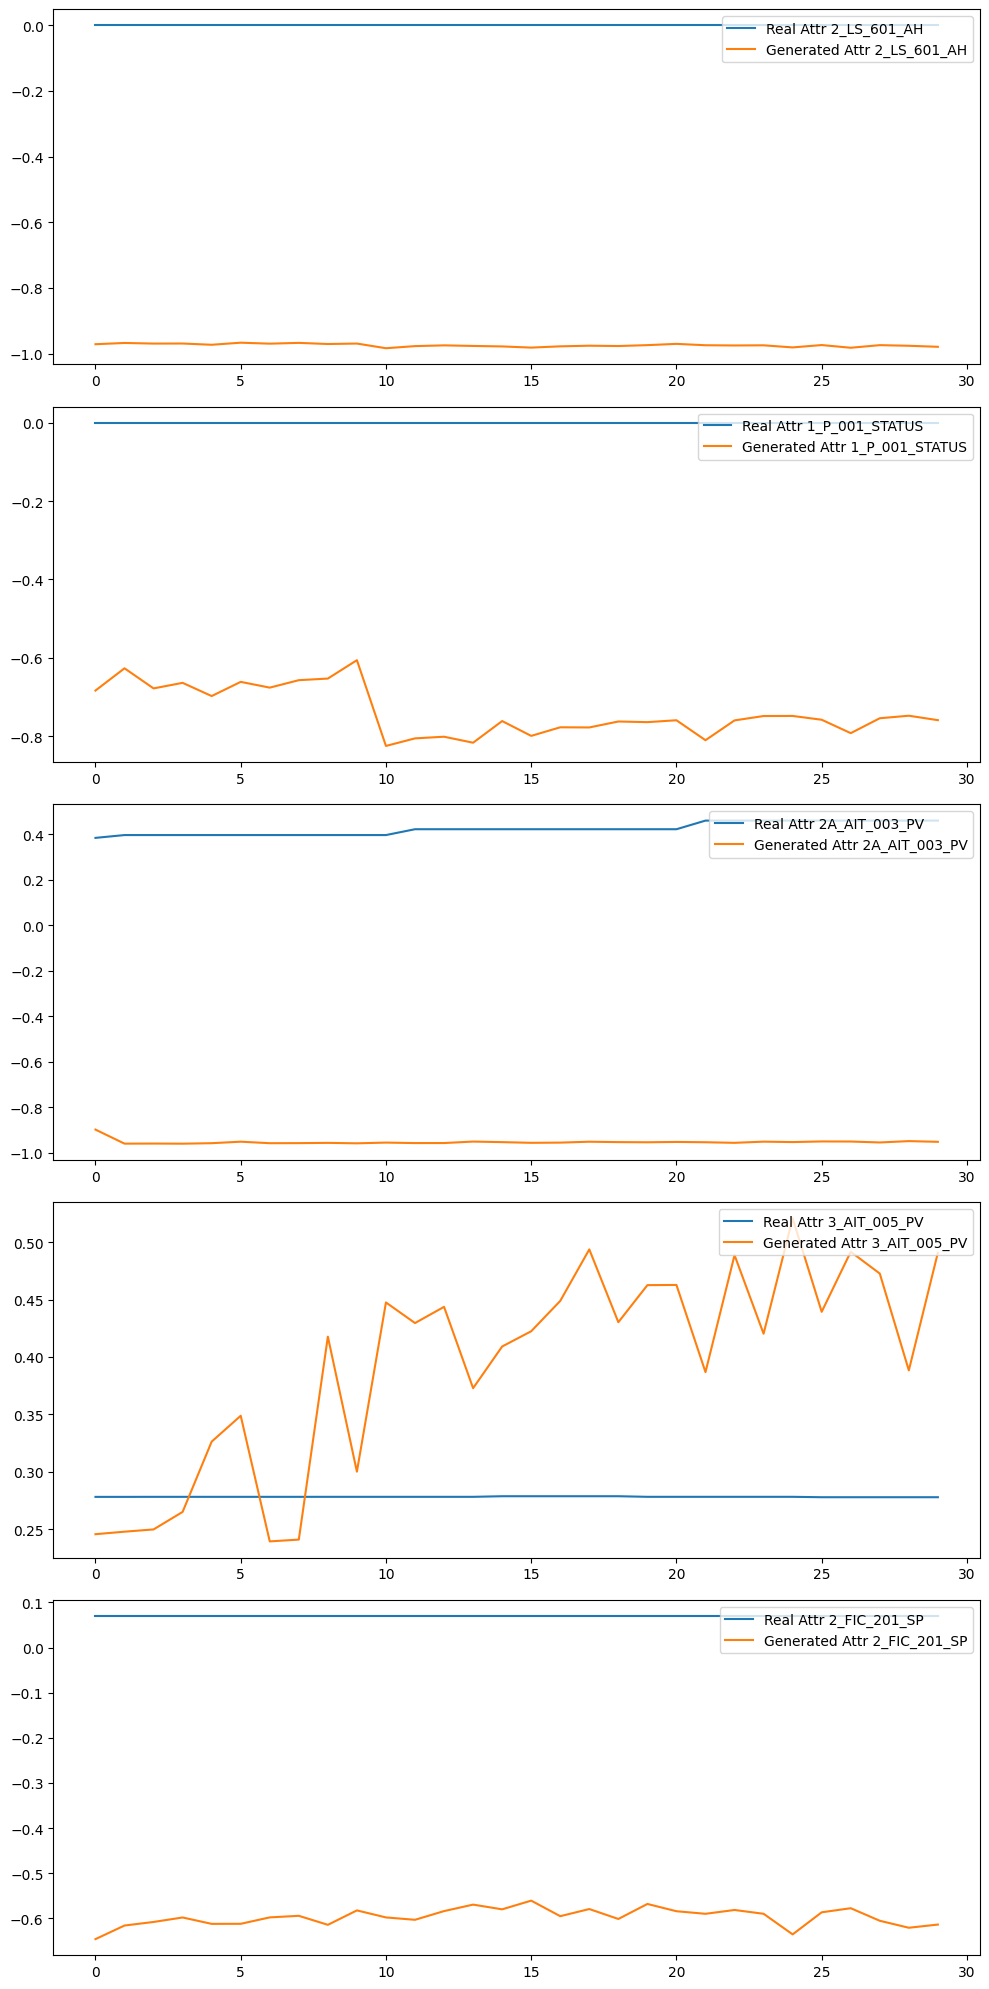

154/154 ━━━━━━━━━━━━━━━━━━━━ 71s 459ms/step - accuracy: 1.0000 - disc_loss: 6.5812e-04 - gen_loss: 8.2485
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 448ms/step - accuracy: 0.9945 - disc_loss: 0.1020 - gen_loss: 11.0955
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.9964 - disc_loss: 0.0406 - gen_loss: 10.0435

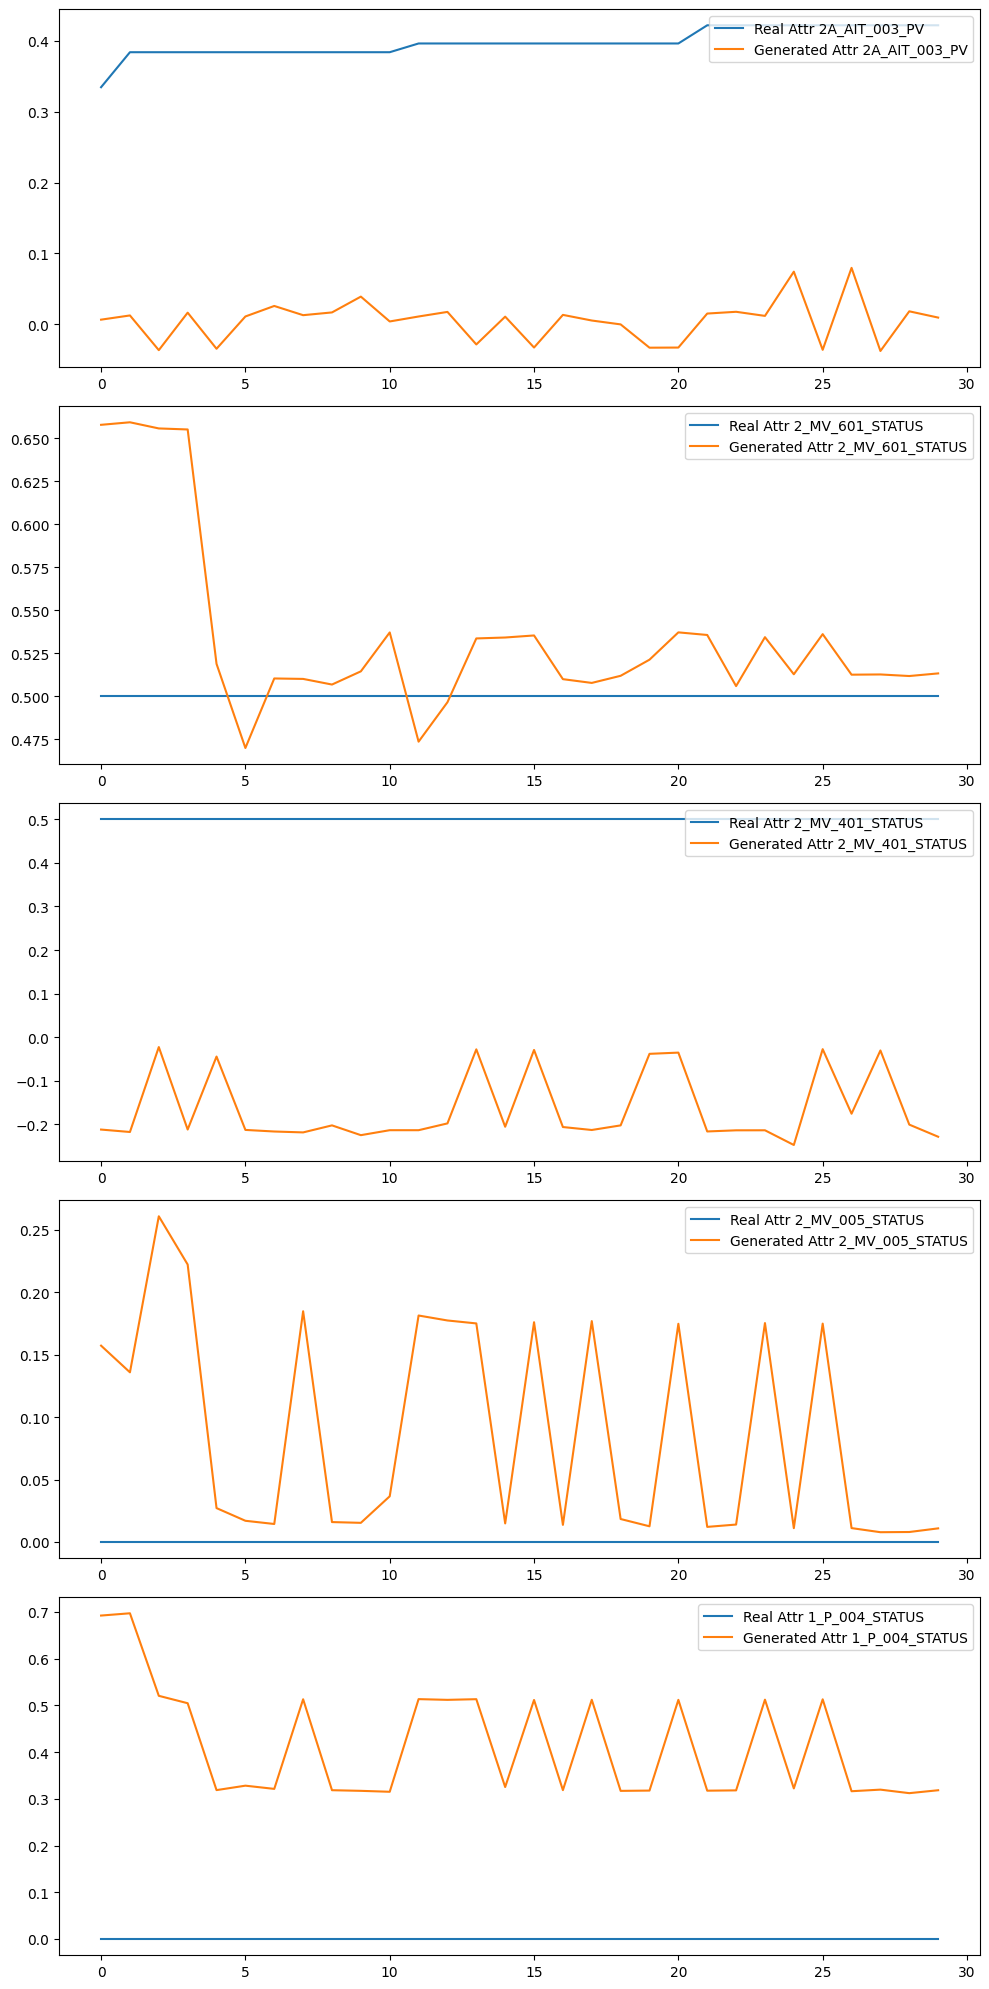

154/154 ━━━━━━━━━━━━━━━━━━━━ 71s 458ms/step - accuracy: 0.9964 - disc_loss: 0.0406 - gen_loss: 10.0424
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 449ms/step - accuracy: 0.9990 - disc_loss: 0.0079 - gen_loss: 10.5726
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.9893 - disc_loss: 0.0906 - gen_loss: 10.8304

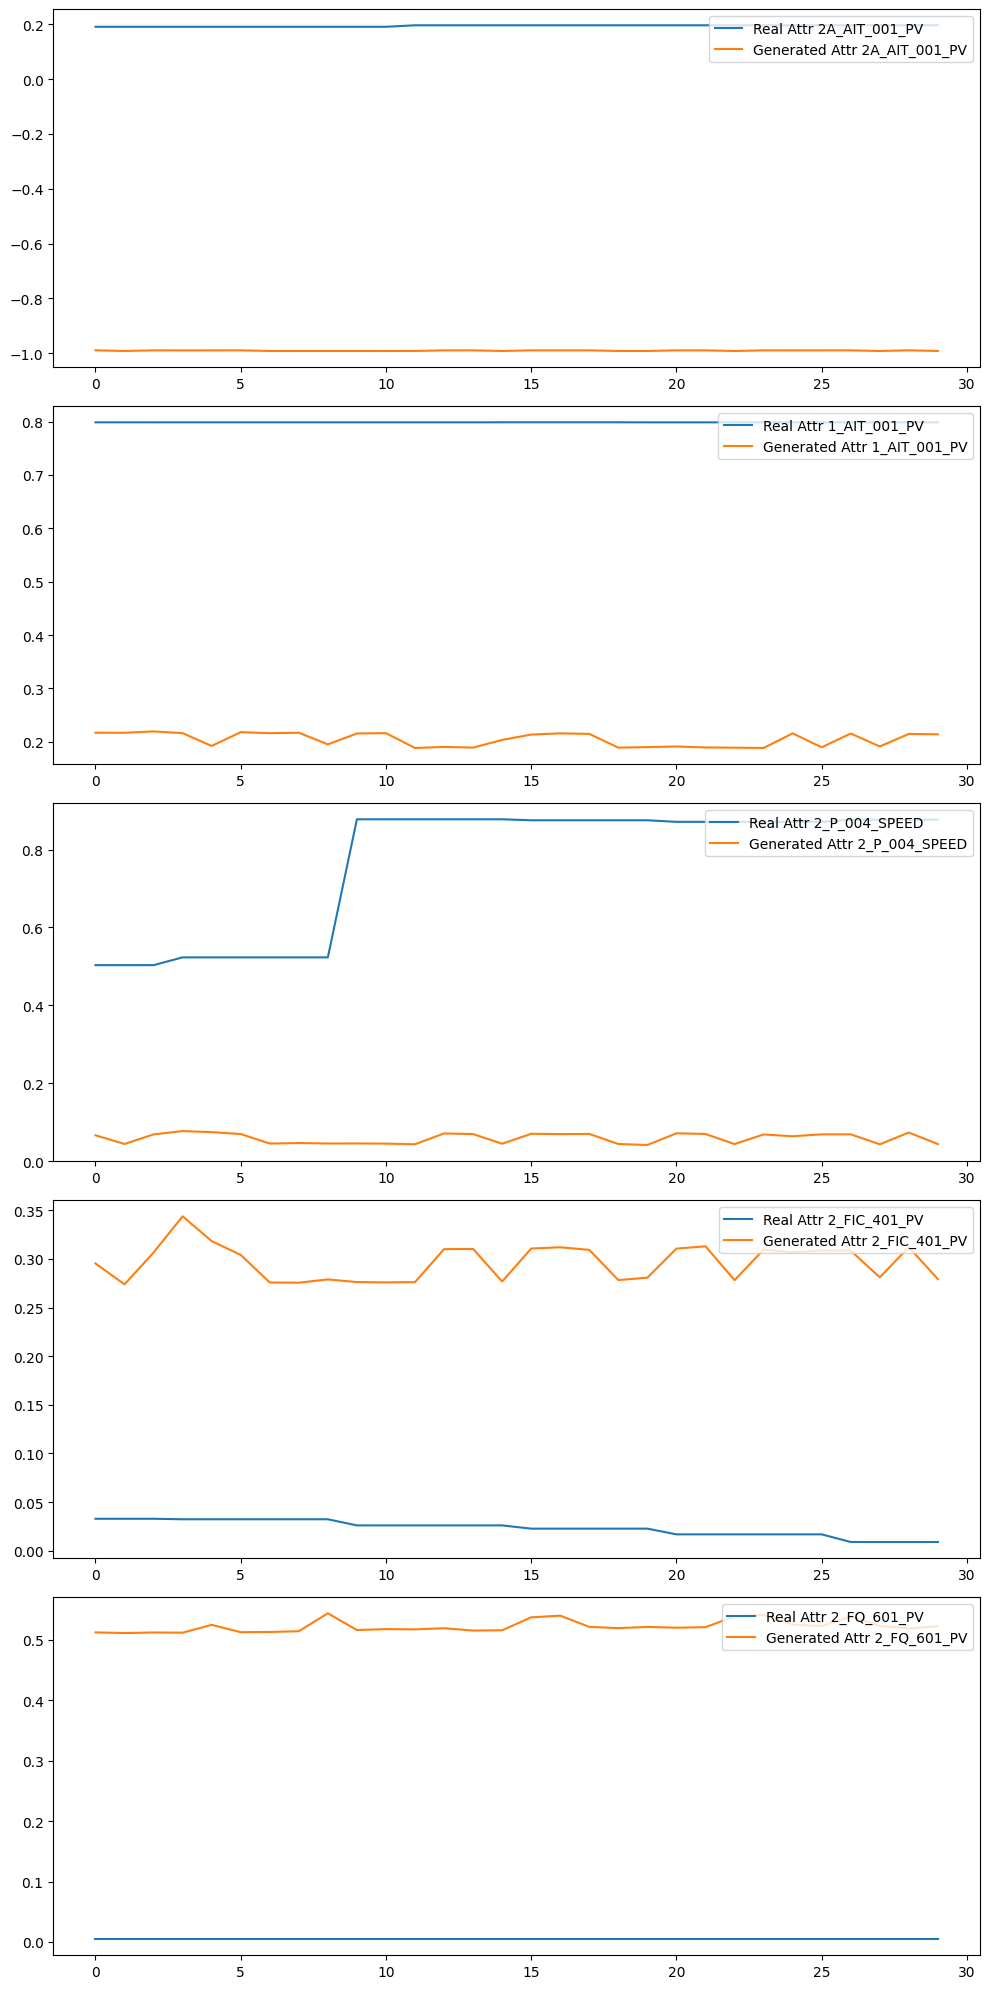

154/154 ━━━━━━━━━━━━━━━━━━━━ 71s 459ms/step - accuracy: 0.9893 - disc_loss: 0.0903 - gen_loss: 10.8302
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 448ms/step - accuracy: 0.9996 - disc_loss: 0.0042 - gen_loss: 11.1758
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.9784 - disc_loss: 0.3618 - gen_loss: 9.5999

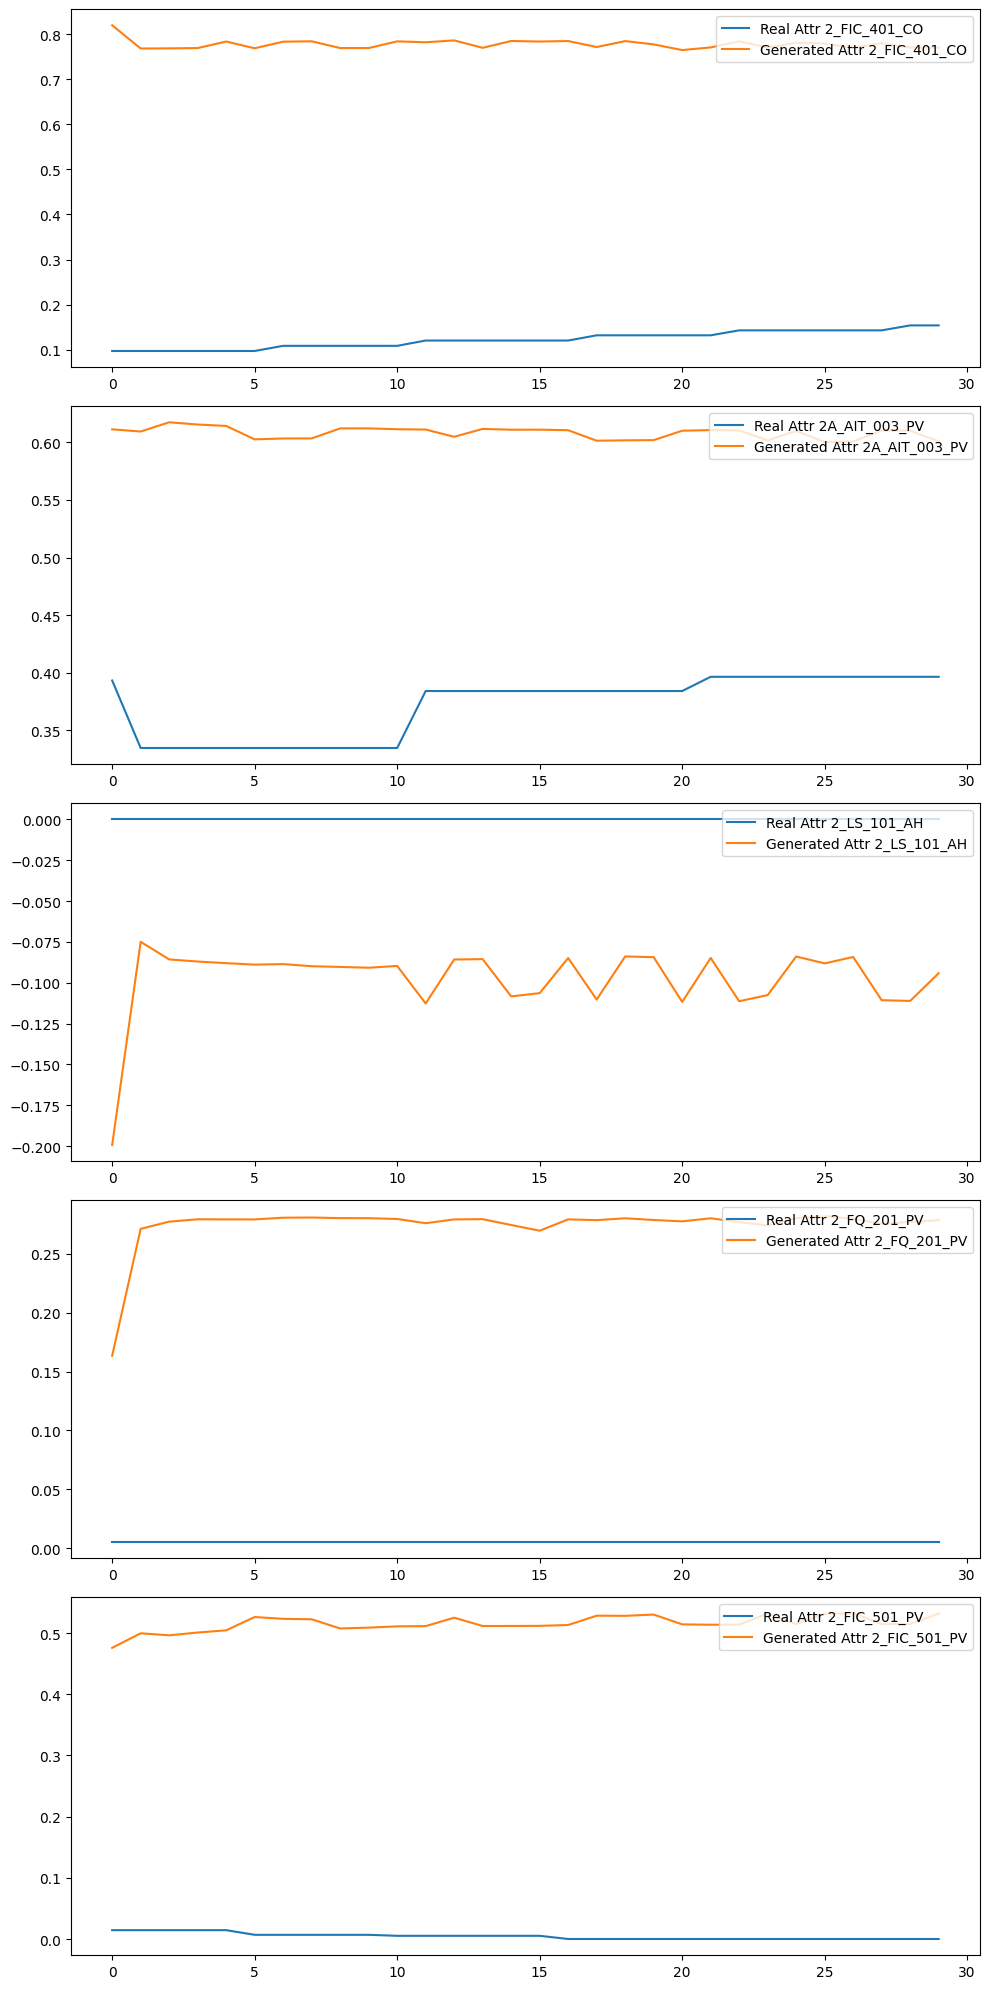

154/154 ━━━━━━━━━━━━━━━━━━━━ 71s 459ms/step - accuracy: 0.9785 - disc_loss: 0.3600 - gen_loss: 9.6040
Epoch 9/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 448ms/step - accuracy: 1.0000 - disc_loss: 3.1408e-04 - gen_loss: 11.4261
Epoch 10/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9963 - disc_loss: 0.0429 - gen_loss: 12.6079

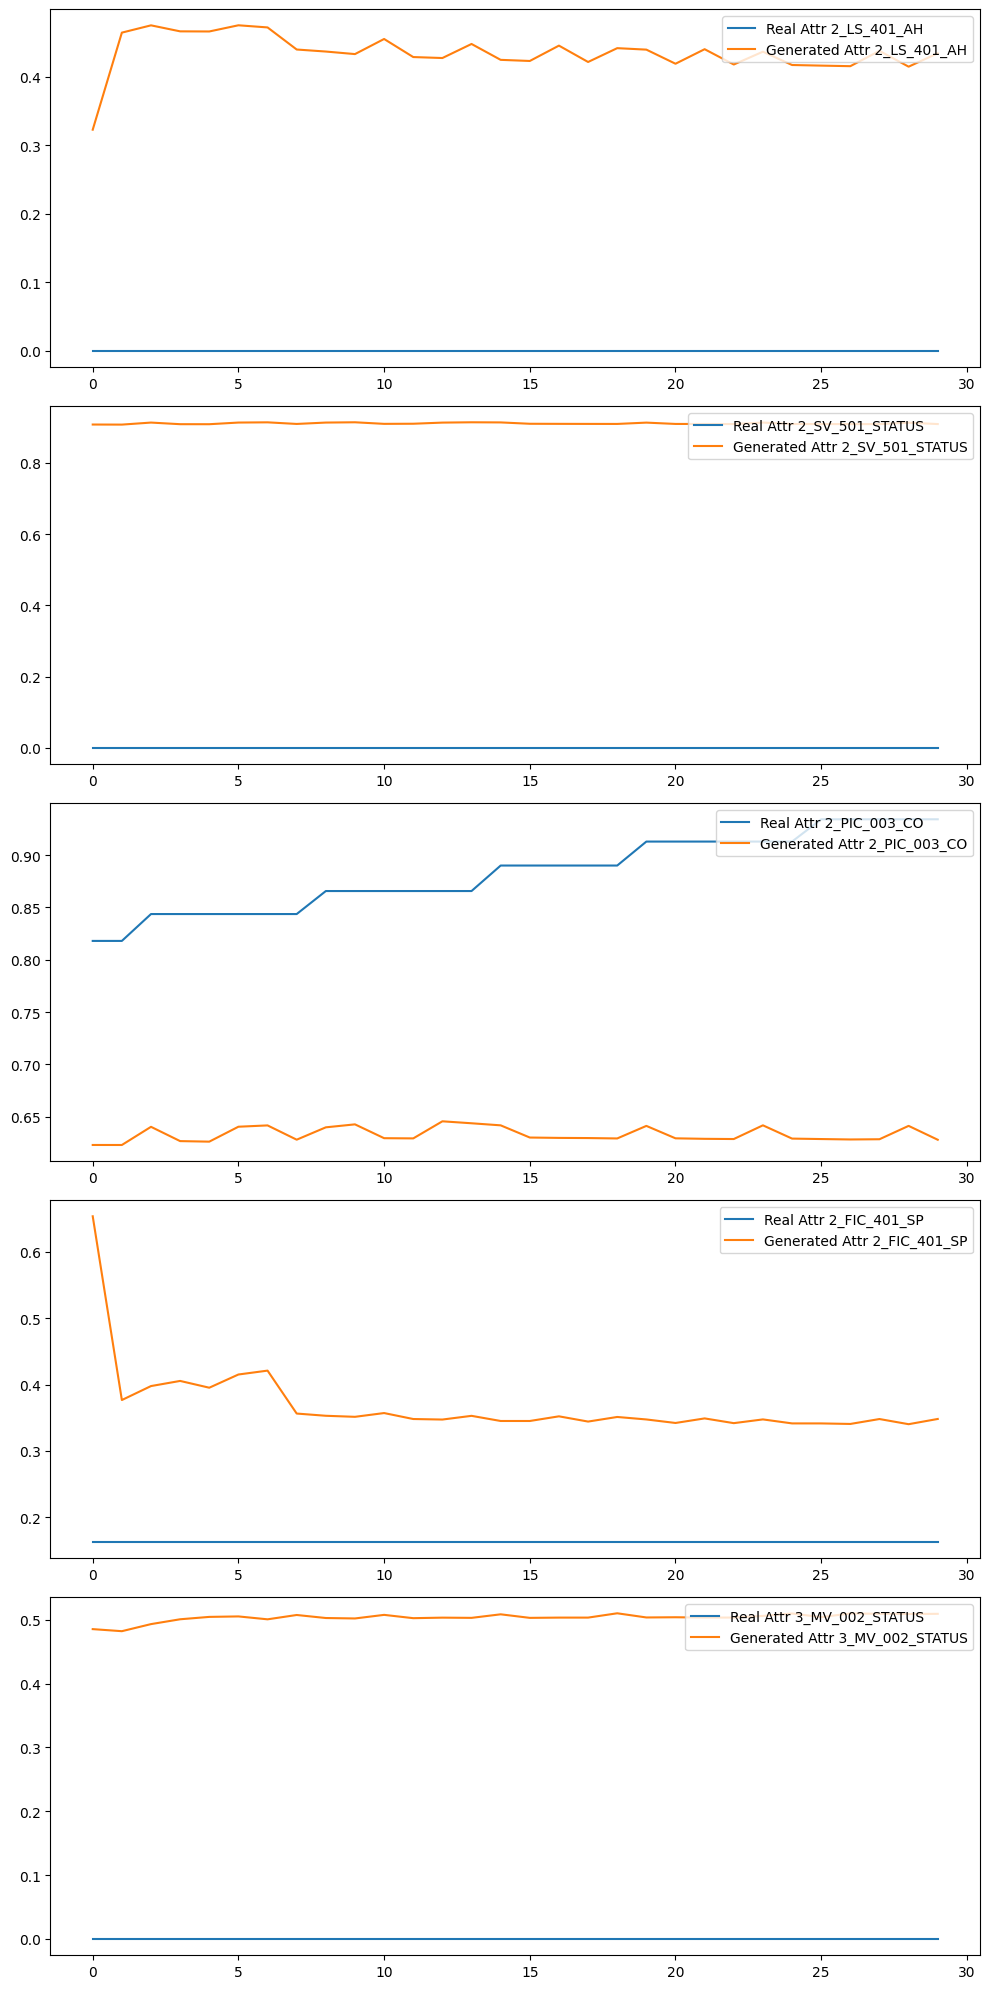

154/154 ━━━━━━━━━━━━━━━━━━━━ 70s 457ms/step - accuracy: 0.9963 - disc_loss: 0.0428 - gen_loss: 12.6069


In [29]:
tf.keras.backend.clear_session()
model.fit(train_data, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[visualization])

In [60]:
save_weights_model(model, save_path)

In [29]:
def optimize_latent(generator, x_real, latent_dim, steps=500, lr=1e-2):

    batch_size, seq_len, _ = x_real.shape
    z_var = tf.Variable(tf.random.normal([batch_size, seq_len, latent_dim]))

    optimizer = tf.keras.optimizers.Adam(lr)
    for step in range(steps):
        with tf.GradientTape() as tape:
            x_reconstructed = generator(z_var, training=False)
            loss = tf.reduce_mean(tf.abs(x_real - x_reconstructed))  # L1 loss

        grads = tape.gradient(loss, [z_var])
        optimizer.apply_gradients(zip(grads, [z_var]))

    return generator(z_var, training=False)

In [30]:
def mix_rbf_kernel(X, Y, sigmas, wts=None):
    X = tf.cast(X, dtype=tf.float64)
    Y = tf.cast(Y, dtype=tf.float64)
    sigmas = tf.cast(sigmas, dtype=tf.float64)
    
    if wts is None:
        wts = tf.ones(tf.shape(sigmas)[0], dtype=tf.float64)

    if len(X.shape) == 2:
        XX = tf.matmul(X, X, transpose_b=True)
        XY = tf.matmul(X, Y, transpose_b=True)
        YY = tf.matmul(Y, Y, transpose_b=True)
    elif len(X.shape) == 3:
        XX = tf.tensordot(X, X, axes=[[1, 2], [1, 2]])
        XY = tf.tensordot(X, Y, axes=[[1, 2], [1, 2]])
        YY = tf.tensordot(Y, Y, axes=[[1, 2], [1, 2]])
    else:
        raise ValueError("Unsupported shape for X")

    X_sq = tf.linalg.diag_part(XX)
    Y_sq = tf.linalg.diag_part(YY)

    r = lambda x: tf.expand_dims(x, 0)
    c = lambda x: tf.expand_dims(x, 1)

    K_XX, K_XY, K_YY = 0.0, 0.0, 0.0
    for i in range(sigmas.shape[0]):
        sigma = sigmas[i]
        wt = wts[i]
        gamma = 1.0 / (2.0 * sigma ** 2)
        K_XX += wt * tf.exp(-gamma * (-2 * XX + c(X_sq) + r(X_sq)))
        K_XY += wt * tf.exp(-gamma * (-2 * XY + c(X_sq) + r(Y_sq)))
        K_YY += wt * tf.exp(-gamma * (-2 * YY + c(Y_sq) + r(Y_sq)))

    return K_XX, K_XY, K_YY, tf.reduce_sum(wts)

def median_pairwise_distance_o(X, Y=None):
    
    if Y is None:
        Y = X  # this is horrendously inefficient, sorry

    if len(X.shape) == 2:
        # matrix
        X_sqnorms = np.einsum('...i,...i', X, X)
        Y_sqnorms = np.einsum('...i,...i', Y, Y)
        XY = np.einsum('ia,ja', X, Y)
    elif len(X.shape) == 3:
        # tensor -- this is computing the Frobenius norm
        X_sqnorms = np.einsum('...ij,...ij', X, X)  # reduce the tensor shape
        Y_sqnorms = np.einsum('...ij,...ij', Y, Y)
        XY = np.einsum('iab,jab', X, Y)  # X*Y^T??
    else:
        raise ValueError(X)

    distances = np.sqrt(X_sqnorms.reshape(-1, 1) - 2 * XY + Y_sqnorms.reshape(1, -1))
    distances = distances.reshape(-1, 1)
    distances = distances[~np.isnan(distances)]
    return np.median(distances)

def invert(generator, settings, samples, e_tolerance=0.1, n_iter=None, max_iter=10000, heuristic_sigma=None):

    samples = tf.convert_to_tensor(samples, dtype=tf.float64)

    Z = tf.Variable(tf.random.normal([samples.shape[0], settings['seq_length'], settings['latent_dim']]), trainable=True)

    def compute_loss():
        G_samples = generator([samples, Z], training=False)
        reshaped_samples = tf.reshape(samples, [samples.shape[0], settings['seq_length'], settings['num_generated_features']])
        Kxx, Kxy, Kyy, wts = mix_rbf_kernel(G_samples, reshaped_samples,
                                            sigmas=tf.constant([heuristic_sigma], dtype=tf.float32))
        similarity_per_sample = tf.linalg.diag_part(Kxy)
        loss = 1 - tf.reduce_mean(similarity_per_sample)
        return loss, similarity_per_sample

    if heuristic_sigma is None:
        heuristic_sigma = median_pairwise_distance_o(samples)
        print("heuristic_sigma:", heuristic_sigma)

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.5)

    for i in range(max_iter if n_iter is None else n_iter):
        with tf.GradientTape() as tape:
            loss, loss_per_sample = compute_loss()
            # print(generator(Z).shape)
            # print(samples.shape)
            # print(generator(Z))
            # print(samples)
            # loss = tf.reduce_mean(tf.abs(tf.cast(generator([samples, Z], training=False), dtype=tf.float64)-tf.reshape(samples, [samples.shape[0], settings['seq_length'], settings['num_generated_features']]))) * 1000
        grads = tape.gradient(loss, [Z])
        optimizer.apply_gradients(zip(grads, [Z]))
        if i%100==0:
            grad_norm = tf.norm(grads[0]).numpy()
            print(f"Iteration {i+1}: Loss = {loss.numpy():.6f}, Grad Norm = {grad_norm:.6f}, MAE = {tf.reduce_mean(tf.abs(tf.cast(generator([samples, Z], training=False), dtype=tf.float64)-tf.reshape(samples, [samples.shape[0], settings['seq_length'], settings['num_generated_features']])))}")
        if n_iter is None and loss < e_tolerance:
            break

    G_samples_final = generator([samples, Z], training=False)
    
    # return G_samples_final.numpy(), Z.numpy(), loss_per_sample.numpy(), heuristic_sigma
    return G_samples_final.numpy(), Z.numpy(), heuristic_sigma

In [31]:
BATCH_SIZE = 512
attack_ds = tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(attack_windows)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [32]:
latent_vectors = tf.zeros((0, WINDOW_SIZE, LATENT_DIM))
for data in tqdm(attack_ds):
    # generated, latent, sigma = invert(
    #     generator=model.generator, 
    #     settings={'batch_size':BATCH_SIZE, 'latent_dim':LATENT_DIM, 'seq_length':WINDOW_SIZE, 'num_generated_features':len(train_cols)},
    #     samples=data, 
    #     e_tolerance=0.1, 
    #     n_iter=500, 
    #     max_iter=10000, 
    #     heuristic_sigma=None
    # )
    latent = tf.random.normal((data.shape[0], WINDOW_SIZE, LATENT_DIM))
    latent_vectors = tf.concat([latent_vectors, latent], axis=0)

100%|██████████| 34/34 [00:00<00:00, 51.26it/s]


In [33]:
# print(generated.shape)
print(latent_vectors.shape)

(17278, 30, 15)


(30, 15, 1)
(30, 122)
(30, 122)
tf.Tensor(0.3755385, shape=(), dtype=float32)


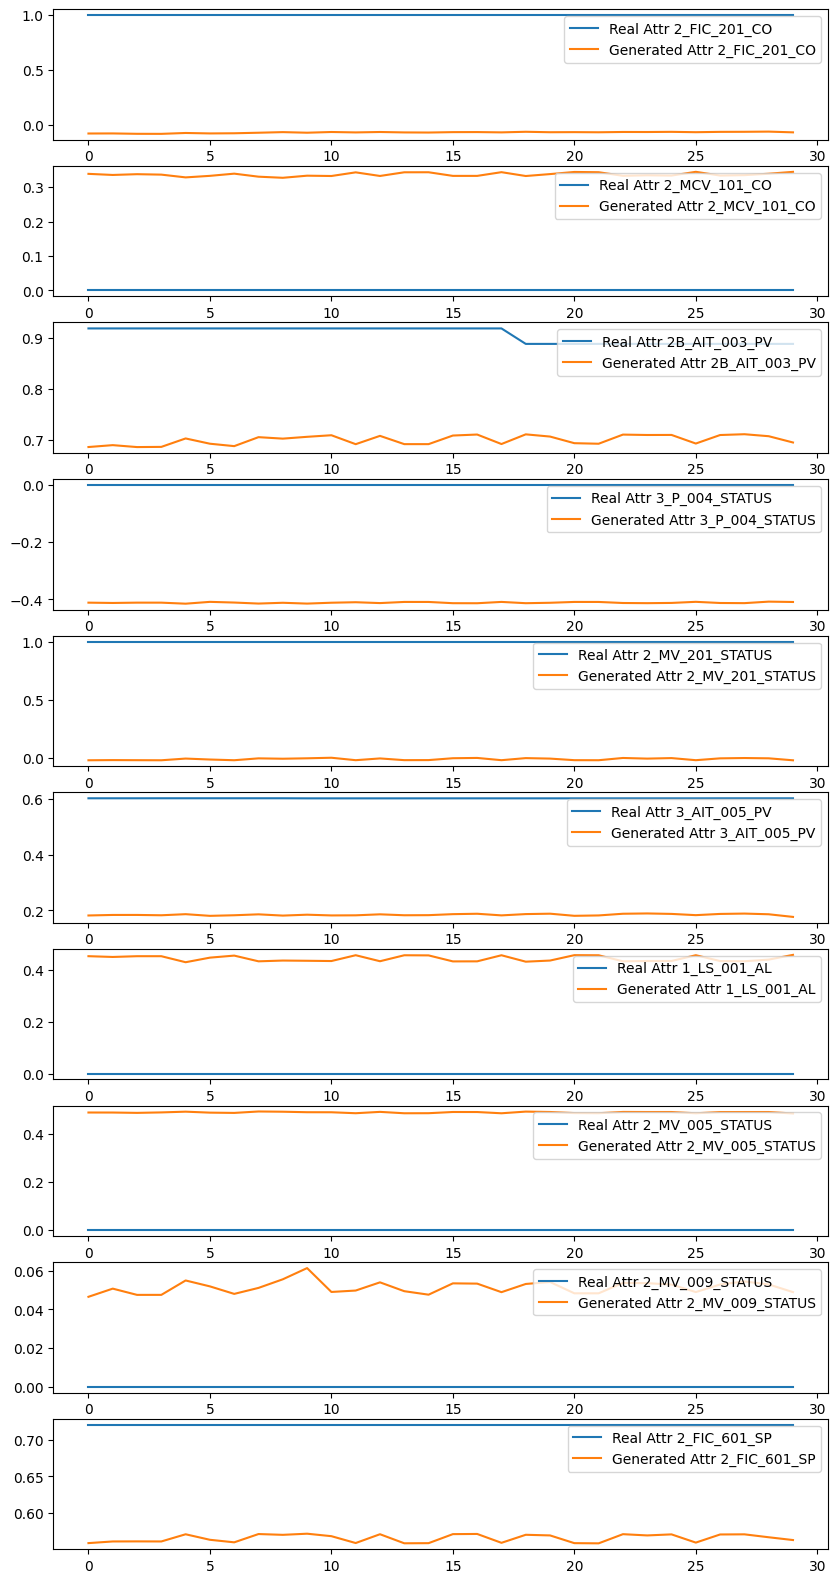

In [34]:
import matplotlib.pyplot as plt

random_idx = np.random.randint(15000, latent_vectors.shape[0])
generated = model.generator([tf.expand_dims(attack_windows[random_idx], axis=0), tf.expand_dims(latent_vectors[random_idx], axis=0)], training=False)[0]
sample_to_invert = attack_windows[random_idx]
print(tf.expand_dims(latent_vectors[random_idx], axis=-1).shape)
print(generated.shape)
print(sample_to_invert.shape)
print(tf.reduce_mean(tf.abs(sample_to_invert-generated)))

fig, ax = plt.subplots(10, 1, figsize=(10, 20))

time = np.arange(WINDOW_SIZE)
random_attr = np.random.choice([i for i in range (len(train_cols))], size=10, replace=False)
# Plot data on each subplot
for i in range (10):
    ax[i].plot(time, sample_to_invert[:, random_attr[i]], label=f"Real Attr {train_cols[random_attr[i]]}")
    ax[i].plot(time, generated[:, random_attr[i]], label=f"Generated Attr {train_cols[random_attr[i]]}")
    ax[i].legend(loc='upper right')

In [35]:
def compute_DR_score(generator, discriminator, x_real, z, lambda_weight=0.5):
    if len(z.shape) < 3:
        z = tf.expand_dims(z, axis=0)
    if len(x_real.shape) < 3:
        x_real = tf.expand_dims(x_real, axis=0)
    
    z = tf.cast(z, dtype=tf.float64)
    x_real = tf.cast(x_real, dtype=tf.float64)
    
    x_recon = generator([x_real, z], training=False)
    x_recon = tf.cast(x_recon, dtype=tf.float64)
    recon_loss = tf.reduce_mean(tf.abs(x_recon - x_real), axis=[1,2])

    disc_output = discriminator(x_real, training=False)
    # print(disc_output.shape)
    disc_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(disc_output), disc_output)
    # print(disc_loss.shape)
    # disc_loss = tf.reshape(disc_loss, [-1])

    recon_loss = tf.cast(recon_loss, dtype=tf.float64)
    disc_loss = tf.cast(disc_loss, dtype=tf.float64)
    # print(recon_loss.shape)
    # print(disc_loss.shape)

    dr_score = lambda_weight * recon_loss + (1 - lambda_weight) * disc_loss
    return dr_score

In [36]:
paired_ds = tf.data.Dataset.from_tensor_slices((attack_windows, latent_vectors)).batch(BATCH_SIZE)

In [37]:
random_idx = np.random.randint(0, attack_windows.shape[0])
compute_DR_score(model.generator, model.discriminator, attack_windows[random_idx], latent_vectors[random_idx])

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.21170479])>

In [38]:
dr_scores = tf.zeros((0,), dtype=tf.float64)
LAMBDA = 0.2

for pair in paired_ds:
    attack_window, latent_vector = pair
    # print(attack_window.shape)
    dr_score = compute_DR_score(model.generator, model.discriminator, attack_window, latent_vector, LAMBDA)
    # print(dr_score.shape)
    # print(dr_scores.shape)
    dr_scores = tf.concat([dr_scores, dr_score], axis=0)

In [39]:
dr_scores

<tf.Tensor: shape=(17278,), dtype=float64, numpy=
array([0.07517538, 0.07432454, 0.07433669, ..., 0.07482456, 0.07535092,
       0.07611743])>

In [40]:
def map_window_scores_to_timestamps(dr_scores, n_timestamps, window_length, step_size):
    """
    Maps window-level DR scores to timestamp-level scores by averaging.
    
    Args:
    - dr_scores (np.array): shape (n_windows,)
    - n_timestamps (int): length of the original time series
    - window_length (int): size of each window
    - step_size (int): stride between windows

    Returns:
    - dr_scores_mapped (np.array): shape (n_timestamps,), average DR score per timestamp
    """
    dr_scores_mapped = np.zeros(n_timestamps)
    counts = np.zeros(n_timestamps)

    for i, score in enumerate(dr_scores):
        start = i * step_size
        end = start + window_length
        if end > n_timestamps:
            break  # Skip incomplete windows at the end
        dr_scores_mapped[start:end] += score
        counts[start:end] += 1

    # Avoid divide-by-zero
    nonzero = counts > 0
    dr_scores_mapped[nonzero] /= counts[nonzero]
    
    return dr_scores_mapped

In [41]:
anomaly_score = map_window_scores_to_timestamps(dr_scores, attack_df.shape[0], WINDOW_SIZE, WINDOW_STEP)

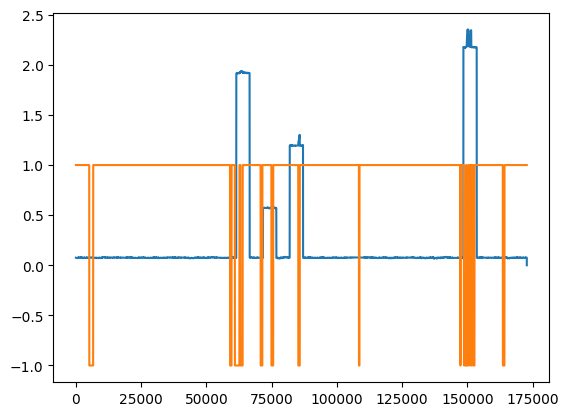

In [42]:
plt.plot(anomaly_score)
plt.plot(label)

In [43]:
label[label==-1].count()

9977

In [44]:
y_true = np.array(list(map(lambda x: 0 if x==1 else 1, label)))

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = []
TAO = 1.2
for num in anomaly_score:
    if num > TAO:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    162824
           1       0.46      0.50      0.48      9977

    accuracy                           0.94    172801
   macro avg       0.72      0.73      0.72    172801
weighted avg       0.94      0.94      0.94    172801



In [64]:
y_scores = anomaly_score/max(anomaly_score)

Accuracy	 0.9377954988686408
Precision	 0.4642923219241443
Recall	 0.5030570311716949
f1 score	 0.48289796507432525
cohen_kappa_score	 0.44986181869484276
auc	 0.8123458296316086
roc_auc	 0.8123458296316086


Text(0.5, 23.52222222222222, 'Ground Truth')

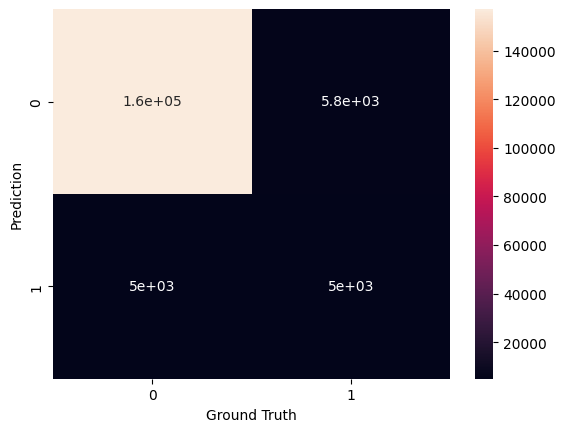

In [65]:
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = (2 * precision * recall)/ (precision + recall)
cohen_kappa_score = cohen_kappa_score(y_true, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_scores)
auc_val = auc(false_positive_rate, true_positive_rate)
roc_auc_val = roc_auc_score(y_true, y_scores)

print('Accuracy\t', accuracy)
print('Precision\t', precision)
print('Recall\t', recall)
print('f1 score\t', f1_score)
print('cohen_kappa_score\t', cohen_kappa_score)
print('auc\t', auc_val)
print('roc_auc\t', roc_auc_val)

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
plt.ylabel('Prediction')
plt.xlabel('Ground Truth')

In [66]:
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    auc,
    average_precision_score
)

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = average_precision_score(y_true, y_scores)
print(f"PR-AUC: {pr_auc:.4f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.4f}")

PR-AUC: 0.3643
ROC-AUC: 0.8123


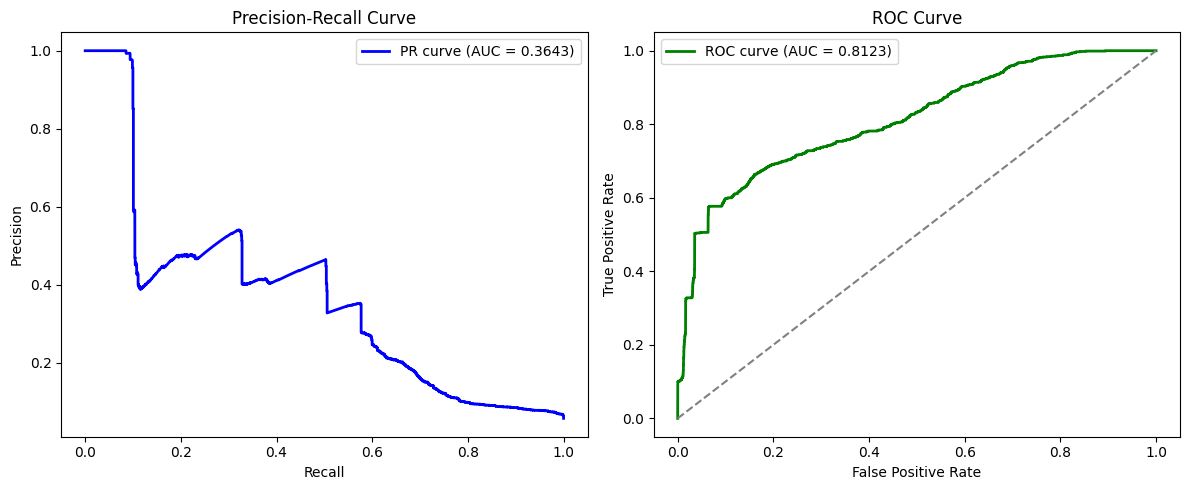

In [67]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()